# Random Forest Regression
---

### Import Basic libraries

In [7]:
# Import basic libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
from sklearn.preprocessing import MultiLabelBinarizer

# Import essential models and functions from sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

### Quick Data Preparation (See Data Preparation file)

In [8]:
animeData = pd.read_csv('Anime_data.csv')
animeData = animeData.drop(['Type','Rank','Description'], axis=1)
animeData = animeData.fillna('')

for i in range(len(animeData)):
    animeData.iloc[i, 1] = animeData.iloc[i, 1].split()[0]

    animeData.iloc[i, 2] = animeData.iloc[i, 2].replace('{', '')
    animeData.iloc[i, 2] = animeData.iloc[i, 2].replace('}', '')
    animeData.iloc[i, 2] = animeData.iloc[i, 2].replace("'", "")
    animeData.iloc[i, 2] = animeData.iloc[i, 2].replace('"', "")
    
    animeData.iloc[i, 3] = animeData.iloc[i, 3].replace('{', '')
    animeData.iloc[i, 3] = animeData.iloc[i, 3].replace('}', '')
    animeData.iloc[i, 3] = animeData.iloc[i, 3].replace("'", "")
    animeData.iloc[i, 2] = animeData.iloc[i, 2].replace('"', "")

animeData['Rating'] = pd.to_numeric(animeData['Rating'])
    
mlb = MultiLabelBinarizer()
t = animeData.pop('Tags').str.replace(', ', ',', regex=False).str.split(',')
nt = animeData.pop('NTags').str.replace(', ', ',', regex=False).str.split(',')
ct = t.combine(nt, lambda x, y : list( (set(x)-{''}) | (set(y)-{''}) ) )

tags = pd.DataFrame(mlb.fit_transform(ct), columns=mlb.classes_, index=animeData.index)
animeData = animeData.join(tags)

#Most frequently seen tag
sums = []
for column in animeData.columns[2:]:
    sums.append(animeData[column].sum())

frequencies = pd.DataFrame(np.column_stack([animeData.columns[2:], sums]), columns=['Tags', 'Frequency']).sort_values(by=['Frequency'], ascending=False)
nanashi = animeData.drop('Name', axis = 1)

#Below this we drop them for not existing enough
threshold = 20

below_threshold = frequencies.loc[frequencies['Frequency'] <= threshold]

#This is how to remove the tags we deem below certain frequency
above_threshold = nanashi.drop(below_threshold['Tags'], axis=1)

### Random Forest Regression

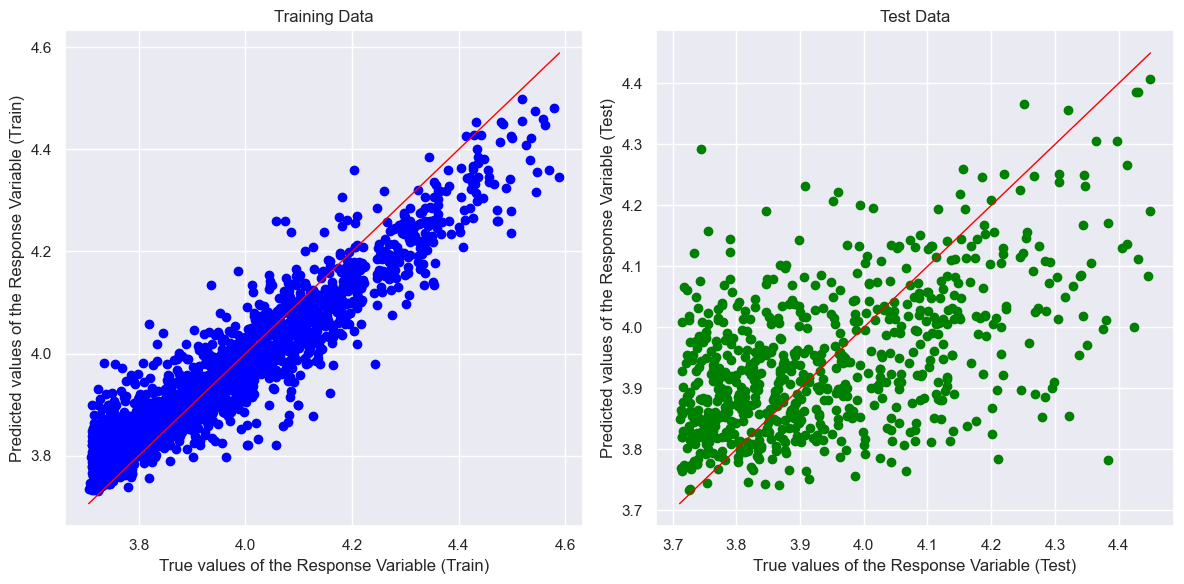

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8672691553255008
Mean Squared Error (MSE) 	: 0.00468258579378081

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.2591272214412327
Mean Squared Error (MSE) 	: 0.02339826978848038



In [9]:
# Random Forest Regression

# Extract Response and Predictors
y = above_threshold["Rating"].values.ravel()
X = above_threshold.drop('Rating', axis=1)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Create a Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Plot the Predictions vs the True values
plt.figure(figsize=(12, 6))

# Plot for training data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linewidth=1)
plt.xlabel("True values of the Response Variable (Train)")
plt.ylabel("Predicted values of the Response Variable (Train)")
plt.title("Training Data")

# Plot for test data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=1)
plt.xlabel("True values of the Response Variable (Test)")
plt.ylabel("Predicted values of the Response Variable (Test)")
plt.title("Test Data")

plt.tight_layout()
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", r2_score(y_train, y_train_pred))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", r2_score(y_test, y_pred))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_pred))
print()